In [4]:
#关键词和词频统计
import pandas as pd
import jieba
import jieba.analyse
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# 定义一个函数来处理每个文件
def process_file(file_path, column_name):
    data = pd.read_csv(file_path)
    text = ' '.join(data[column_name].dropna())

    # 对于中文文本使用 jieba 进行关键词提取和词频统计
    if 'Chinese' in file_path:
        keywords = jieba.analyse.extract_tags(text, topK=10)
        words = jieba.lcut(text)
        word_freq = Counter(words).most_common(10)
    else:
        # 对于英文文本使用 TfidfVectorizer 进行关键词提取
        vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
        tfidf_matrix = vectorizer.fit_transform([text])
        feature_array = vectorizer.get_feature_names_out()
        tfidf_sorting = tfidf_matrix.max(axis=0).toarray()[0].argsort()[::-1]
        keywords = feature_array[tfidf_sorting][:10]

        # 词频统计
        word_freq = pd.Series(text.split()).value_counts().head(10)

    print(f"File: {file_path}")
    print(f"Top 10 Keywords: {keywords}")
    print(f"Top 10 Word Frequency: {word_freq}")
    print("\n")

# 文件路径和对应的列名
files_columns = [
    ('/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv', 'title_segmented'),
    ('/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv', 'title_processed'),
    ('/content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed'),
    ('/content/preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed')
]

# 处理每个文件
for file, column in files_columns:
    process_file(file, column)


File: /content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv
Top 10 Keywords: ['冲突', '加沙', '联合国', '第天', '新闻', '新华网', '环球网', '哈马斯', '以军', '以色列']
Top 10 Word Frequency: [(' ', 1246), ('冲突', 82), ('以', 82), ('巴', 80), ('中国', 27), ('联合国', 23), ('加沙', 22), ('新闻', 22), ('新华网', 18), ('网', 17)]


File: /content/preprocessed_English_version_of_Google_News_crawling_yifan.csv
Top 10 Keywords: ['conflict' 'israelipalestinian' 'english' 'jazeera' 'al' 'war' 'israeli'
 'israel' 'gaza' 'israelhamas']
Top 10 Word Frequency: conflict              45
israelipalestinian    40
english               29
al                    23
jazeera               23
war                   19
israeli               11
israel                10
gaza                  10
israelhamas            9
dtype: int64


File: /content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv
Top 10 Keywords: ['以色列', '巴勒斯坦', '加沙', '犹太人', '年月日', '巴勒斯坦人', '哈马斯', '阿拉伯', '冲突', '地带']
Top 10 Word Freq

<ipython-input-7-7f8a2e688c8e>:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts_chinese = data_chinese.groupby(data_chinese['pubDate'].dt.to_period('M')).size()
<ipython-input-7-7f8a2e688c8e>:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts_english = data_english.groupby(data_english['pubDate'].dt.to_period('M')).size()


pubDate
2023-11    73
2023-12    27
Freq: M, dtype: int64
pubDate
2023-11    59
2023-12    41
Freq: M, dtype: int64


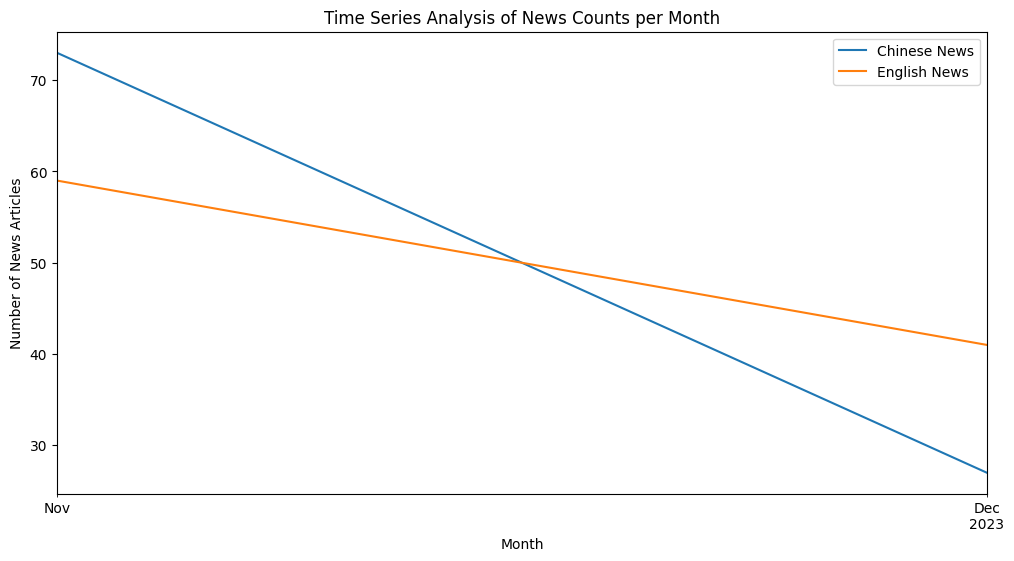

In [7]:
#时序分析
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径
file_path_chinese = '/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv'
file_path_english = '/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv'

# 加载数据
data_chinese = pd.read_csv(file_path_chinese)
data_english = pd.read_csv(file_path_english)

# 将 pubDate 转换为 datetime 格式
data_chinese['pubDate'] = pd.to_datetime(data_chinese['pubDate'])
data_english['pubDate'] = pd.to_datetime(data_english['pubDate'])

# 按月份进行分组并计数
monthly_counts_chinese = data_chinese.groupby(data_chinese['pubDate'].dt.to_period('M')).size()
monthly_counts_english = data_english.groupby(data_english['pubDate'].dt.to_period('M')).size()

print(monthly_counts_chinese)
print(monthly_counts_english)

# 绘制时间序列图
plt.figure(figsize=(12, 6))
monthly_counts_chinese.plot(label='Chinese News')
monthly_counts_english.plot(label='English News')
plt.title('Time Series Analysis of News Counts per Month')
plt.xlabel('Month')
plt.ylabel('Number of News Articles')
plt.legend()
plt.show()


In [10]:
#文本相似度分析
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(file_path, text_column):
    # 读取数据
    data = pd.read_csv(file_path)

    # 移除缺失值
    data = data.dropna(subset=[text_column])

    # 提取特定的文本列进行分析
    texts = data[text_column]

    # 计算 TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)

    # 计算余弦相似度
    cosine_sim = cosine_similarity(tfidf_matrix)

    # 返回相似度矩阵
    return cosine_sim

# 文件路径和对应处理的文本列
files_columns = [
    ('/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv', 'title_segmented'),
    ('/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv', 'title_processed'),
    ('/content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed'),
    ('/content/preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed')
]

# 对每个文件执行相似度分析
for file_path, text_column in files_columns:
    similarity_matrix = calculate_similarity(file_path, text_column)
    print(f"Similarity matrix for {file_path.split('/')[-1]}:")
    print(similarity_matrix)


Similarity matrix for preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv:
[[1.         0.01337066 0.         ... 0.16903329 0.         0.01009237]
 [0.01337066 1.         0.12298484 ... 0.07826255 0.         0.00821536]
 [0.         0.12298484 1.         ... 0.05620706 0.         0.        ]
 ...
 [0.16903329 0.07826255 0.05620706 ... 1.         0.         0.00693803]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.01009237 0.00821536 0.         ... 0.00693803 0.         1.        ]]
Similarity matrix for preprocessed_English_version_of_Google_News_crawling_yifan.csv:
[[1.         0.         0.         ... 0.         0.         0.13198827]
 [0.         1.         0.         ... 0.         0.05355646 0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.10548387 0.        ]
 [0.         0.05355646 0.         ... 0.10548387 1.         0.        ]
 [0.13198827 0

In [7]:
import pandas as pd
from textblob import TextBlob
from snownlp import SnowNLP

# 定义一个函数来进行情感分析
def perform_sentiment_analysis(file_path, text_column, is_chinese=False):
    data = pd.read_csv(file_path)
    sentiments = []
    # 移除缺失值
    data = data.dropna(subset=[text_column])

    for text in data[text_column].dropna():
        if is_chinese:
            # 使用 SnowNLP 进行中文情感分析
            sentiment = SnowNLP(text).sentiments
        else:
            # 使用 TextBlob 进行英文情感分析
            sentiment = TextBlob(text).sentiment.polarity
        sentiments.append(sentiment)

    # 将情感分数添加到数据框中
    data['sentiment'] = sentiments
    return data

# 文件路径和对应处理的文本列
files_columns = [
    ('/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv', 'title_segmented', True),
    ('/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv', 'title_processed', False),
    ('/content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed', True),
    ('/content/preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed', False)
]


# 对每个文件执行情感分析并保存结果
for file_path, text_column, is_chinese in files_columns:
    analyzed_data = perform_sentiment_analysis(file_path, text_column, is_chinese)

    # 输出结果到 CSV 文件
    output_file_path = file_path.replace("preprocessed_", "sentiment_analysis_")
    analyzed_data.to_csv(output_file_path, index=False)

    print(f"Sentiment analysis completed for {file_path.split('/')[-1]}")
    print(f"Results saved to {output_file_path}")


Sentiment analysis completed for preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv
Results saved to /content/sentiment_analysis_Chinese_version_of_Google_News_crawling_yifan.csv
Sentiment analysis completed for preprocessed_English_version_of_Google_News_crawling_yifan.csv
Results saved to /content/sentiment_analysis_English_version_of_Google_News_crawling_yifan.csv
Sentiment analysis completed for preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv
Results saved to /content/sentiment_analysis_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv
Sentiment analysis completed for preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv
Results saved to /content/sentiment_analysis_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv


In [2]:
pip install SnowNLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SnowNLP: filename=snownlp-0.12.3-py3-none-any.whl size=37760944 sha256=c63a7752535cafe7e10d7aafeb9e7ec1e44a9cdc2dbeece197c8cae57970e224
  Stored in directory: /root/.cache/pip/wheels/43/f3/70/8990fc249efeb396007766676706f71dd3d1ca3c023ce522ce
Successfully built SnowNLP


In [9]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')


# 定义一个函数来读取数据并进行预处理
def load_and_preprocess(file_path, text_column):
    data = pd.read_csv(file_path)
    data = data.dropna(subset=[text_column])
    texts = data[text_column].apply(lambda x: word_tokenize(x.lower()))
    stop_words = set(stopwords.words('english'))
    texts = texts.apply(lambda x: [word for word in x if word not in stop_words])
    return texts

# 读取和预处理数据
file_paths = [
    '/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv',
    '/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv',
    '/content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv',
    '/content/preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv'
]
text_columns = ['title_segmented', 'title_processed', 'content_processed', 'content_processed']

corpora_documents = []
for file_path, text_column in zip(file_paths, text_columns):
    texts = load_and_preprocess(file_path, text_column)
    corpora_documents.extend(texts)

# 创建字典和语料库
dictionary = corpora.Dictionary(corpora_documents)
corpus = [dictionary.doc2bow(text) for text in corpora_documents]

# 应用LDA主题建模
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# 打印主题
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Topic: 0 
Words: 0.037*"埃及" + 0.008*"超过" + 0.004*"社会" + 0.004*"使" + 0.004*"引发" + 0.004*"观察" + 0.004*"正在" + 0.003*"撤离" + 0.003*"灾难" + 0.003*"俄罗斯"
Topic: 1 
Words: 0.044*"冲突" + 0.038*"以" + 0.030*"巴" + 0.019*"巴勒斯坦人" + 0.017*"联合国" + 0.014*"方案" + 0.013*"名" + 0.013*"死亡" + 0.012*"将" + 0.010*"加沙"
Topic: 2 
Words: 0.013*"造成" + 0.009*"经济" + 0.009*"升级" + 0.007*"北部" + 0.007*"或" + 0.007*"里" + 0.007*"关系" + 0.006*"宣布" + 0.005*"让" + 0.005*"杰哈德"
Topic: 3 
Words: 0.072*"巴勒斯坦" + 0.012*"支持" + 0.012*"定居点" + 0.012*"他" + 0.011*"阿巴斯" + 0.010*"同时" + 0.009*"建立" + 0.007*"和平" + 0.006*"编辑" + 0.006*"宣布"
Topic: 4 
Words: 0.038*"年" + 0.021*"犹太人" + 0.012*"与" + 0.012*"美国" + 0.012*"英国" + 0.009*"被" + 0.008*"为" + 0.008*"巴勒斯坦地区" + 0.008*"阿拉伯人" + 0.007*"中"
Topic: 5 
Words: 0.020*"编辑" + 0.017*"军队" + 0.016*"发动" + 0.013*"向" + 0.011*"美国" + 0.008*"黎巴嫩" + 0.007*"南部" + 0.006*"示威" + 0.005*"各" + 0.005*"多"
Topic: 6 
Words: 0.023*"palestinian" + 0.018*"israel" + 0.016*"israeli" + 0.010*"gaza" + 0.009*"conflict" + 0.009*"palestinians" 

In [10]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

def analyze_text_style(file_path, text_column):
    data = pd.read_csv(file_path)
    text = ' '.join(data[text_column].dropna())

    # Tokenization
    words = word_tokenize(text)
    sentences = sent_tokenize(text)

    # Remove punctuation and stopwords
    words = [word for word in words if word not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Calculating lexical richness
    lexical_richness = len(set(words)) / len(words)

    # Average sentence length
    avg_sentence_length = len(words) / len(sentences)

    # Most common words and phrases
    freq_dist = FreqDist(words)
    most_common_words = freq_dist.most_common(10)

    # Part of speech distribution
    pos_tags = nltk.pos_tag(words)
    pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags)

    return {
        "lexical_richness": lexical_richness,
        "avg_sentence_length": avg_sentence_length,
        "most_common_words": most_common_words,
        "pos_distribution": pos_counts
    }

# 文件路径和对应处理的文本列
files_columns = [
    ('/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv', 'title_segmented'),
    ('/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv', 'title_processed'),
    ('/content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed'),
    ('/content/preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed')
]

# 对每个文件进行语言风格分析
for file_path, text_column in files_columns:
    style_analysis = analyze_text_style(file_path, text_column)
    print(f"Language style analysis for {file_path.split('/')[-1]}:")
    print(style_analysis)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Language style analysis for preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv:
{'lexical_richness': 0.4466720128307939, 'avg_sentence_length': 1247.0, 'most_common_words': [('冲突', 82), ('以', 68), ('巴', 66), ('中国', 27), ('联合国', 23), ('加沙', 22), ('新闻', 22), ('新华网', 18), ('网', 17), ('巴以', 14)], 'pos_distribution': FreqDist({'NNP': 1245, 'JJ': 1, 'NN': 1})}
Language style analysis for preprocessed_English_version_of_Google_News_crawling_yifan.csv:
{'lexical_richness': 0.5516431924882629, 'avg_sentence_length': 852.0, 'most_common_words': [('conflict', 45), ('israelipalestinian', 40), ('english', 29), ('al', 23), ('jazeera', 23), ('war', 19), ('israeli', 11), ('israel', 10), ('gaza', 10), ('israelhamas', 9)], 'pos_distribution': FreqDist({'NN': 356, 'JJ': 224, 'NNS': 107, 'VBP': 57, 'VBZ': 26, 'VBG': 16, 'VBD': 13, 'IN': 11, 'RB': 10, 'PRP': 8, ...})}
Language style analysis for preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv:
{'lexical_rich

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.900 seconds.
DEBUG:jieba:Loading model cost 0.900 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


File: /content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv
Top 10 Keywords: ['冲突', '加沙', '联合国', '第天', '新闻', '新华网', '环球网', '哈马斯', '以军', '以色列']
Top 10 Word Frequency: [(' ', 1246), ('冲突', 82), ('以', 82), ('巴', 80), ('中国', 27), ('联合国', 23), ('加沙', 22), ('新闻', 22), ('新华网', 18), ('网', 17)]


File: /content/preprocessed_English_version_of_Google_News_crawling_yifan.csv
Top 10 Keywords: ['conflict' 'israelipalestinian' 'english' 'jazeera' 'al' 'war' 'israeli'
 'israel' 'gaza' 'israelhamas']
Top 10 Word Frequency: conflict              45
israelipalestinian    40
english               29
al                    23
jazeera               23
war                   19
israeli               11
israel                10
gaza                  10
israelhamas            9
dtype: int64


File: /content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv
Top 10 Keywords: ['以色列', '巴勒斯坦', '加沙', '犹太人', '年月日', '巴勒斯坦人', '哈马斯', '阿拉伯', '冲突', '地带']
Top 10 Word Freq

<ipython-input-11-ffdcce80256d>:85: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts_chinese = data_chinese.groupby(data_chinese['pubDate'].dt.to_period('M')).size()
<ipython-input-11-ffdcce80256d>:86: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts_english = data_english.groupby(data_english['pubDate'].dt.to_period('M')).size()


pubDate
2023-11    73
2023-12    27
Freq: M, dtype: int64
pubDate
2023-11    59
2023-12    41
Freq: M, dtype: int64


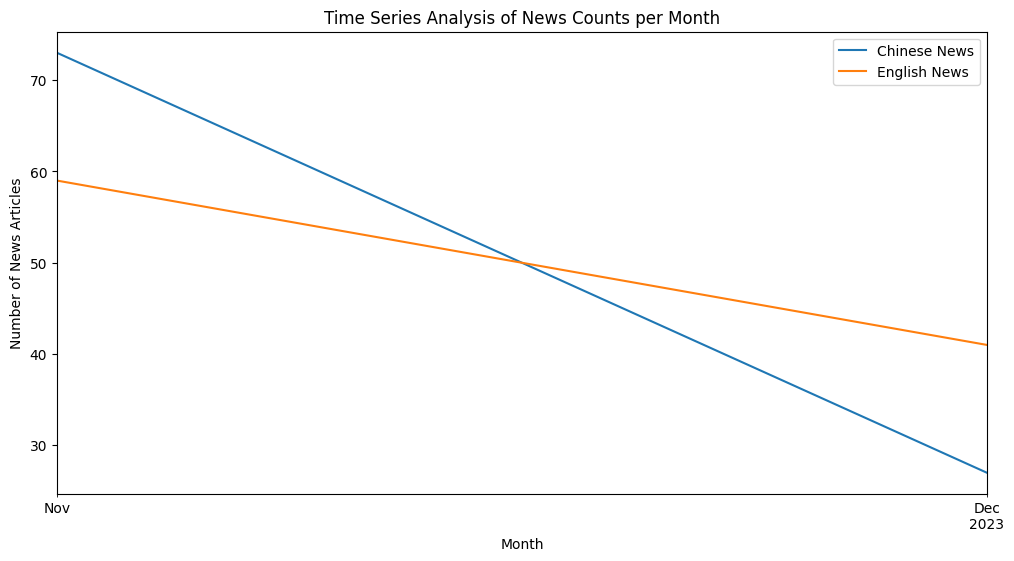

Similarity matrix for preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv:
[[1.         0.01337066 0.         ... 0.16903329 0.         0.01009237]
 [0.01337066 1.         0.12298484 ... 0.07826255 0.         0.00821536]
 [0.         0.12298484 1.         ... 0.05620706 0.         0.        ]
 ...
 [0.16903329 0.07826255 0.05620706 ... 1.         0.         0.00693803]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.01009237 0.00821536 0.         ... 0.00693803 0.         1.        ]]
Similarity matrix for preprocessed_English_version_of_Google_News_crawling_yifan.csv:
[[1.         0.         0.         ... 0.         0.         0.13198827]
 [0.         1.         0.         ... 0.         0.05355646 0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.10548387 0.        ]
 [0.         0.05355646 0.         ... 0.10548387 1.         0.        ]
 [0.13198827 0

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic: 0 
Words: 0.037*"埃及" + 0.008*"超过" + 0.004*"社会" + 0.004*"使" + 0.004*"引发" + 0.004*"观察" + 0.004*"正在" + 0.003*"撤离" + 0.003*"灾难" + 0.003*"俄罗斯"
Topic: 1 
Words: 0.044*"冲突" + 0.038*"以" + 0.030*"巴" + 0.019*"巴勒斯坦人" + 0.017*"联合国" + 0.014*"方案" + 0.013*"名" + 0.013*"死亡" + 0.012*"将" + 0.010*"加沙"
Topic: 2 
Words: 0.013*"造成" + 0.009*"经济" + 0.009*"升级" + 0.007*"北部" + 0.007*"或" + 0.007*"里" + 0.007*"关系" + 0.006*"宣布" + 0.005*"让" + 0.005*"杰哈德"
Topic: 3 
Words: 0.072*"巴勒斯坦" + 0.012*"支持" + 0.012*"定居点" + 0.012*"他" + 0.011*"阿巴斯" + 0.010*"同时" + 0.009*"建立" + 0.007*"和平" + 0.006*"编辑" + 0.006*"宣布"
Topic: 4 
Words: 0.038*"年" + 0.021*"犹太人" + 0.012*"与" + 0.012*"美国" + 0.012*"英国" + 0.009*"被" + 0.008*"为" + 0.008*"巴勒斯坦地区" + 0.008*"阿拉伯人" + 0.007*"中"
Topic: 5 
Words: 0.020*"编辑" + 0.017*"军队" + 0.016*"发动" + 0.013*"向" + 0.011*"美国" + 0.008*"黎巴嫩" + 0.007*"南部" + 0.006*"示威" + 0.005*"各" + 0.005*"多"
Topic: 6 
Words: 0.023*"palestinian" + 0.018*"israel" + 0.016*"israeli" + 0.010*"gaza" + 0.009*"conflict" + 0.009*"palestinians" 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Language style analysis for preprocessed_English_version_of_Google_News_crawling_yifan.csv:
{'lexical_richness': 0.5516431924882629, 'avg_sentence_length': 852.0, 'most_common_words': [('conflict', 45), ('israelipalestinian', 40), ('english', 29), ('al', 23), ('jazeera', 23), ('war', 19), ('israeli', 11), ('israel', 10), ('gaza', 10), ('israelhamas', 9)], 'pos_distribution': FreqDist({'NN': 356, 'JJ': 224, 'NNS': 107, 'VBP': 57, 'VBZ': 26, 'VBG': 16, 'VBD': 13, 'IN': 11, 'RB': 10, 'PRP': 8, ...})}
Language style analysis for preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv:
{'lexical_richness': 0.3733133433283358, 'avg_sentence_length': 4669.0, 'most_common_words': [('以色列', 175), ('年', 72), ('巴勒斯坦', 69), ('犹太人', 46), ('月', 41), ('加沙', 37), ('年月日', 33), ('与', 32), ('美国', 32), ('对', 32)], 'pos_distribution': FreqDist({'NNP': 4667, 'JJ': 1, 'NN': 1})}
Language style analysis for preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_

In [11]:
import pandas as pd
import jieba
import jieba.analyse
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from textblob import TextBlob
from snownlp import SnowNLP
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

# 分析一关键词和词频统计
# 定义一个函数来处理每个文件
def process_file(file_path, column_name):
    data = pd.read_csv(file_path)
    text = ' '.join(data[column_name].dropna())

    # 对于中文文本使用 jieba 进行关键词提取和词频统计
    if 'Chinese' in file_path:
        keywords = jieba.analyse.extract_tags(text, topK=10)
        words = jieba.lcut(text)
        word_freq = Counter(words).most_common(10)
    else:
        # 对于英文文本使用 TfidfVectorizer 进行关键词提取
        vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
        tfidf_matrix = vectorizer.fit_transform([text])
        feature_array = vectorizer.get_feature_names_out()
        tfidf_sorting = tfidf_matrix.max(axis=0).toarray()[0].argsort()[::-1]
        keywords = feature_array[tfidf_sorting][:10]

        # 词频统计
        word_freq = pd.Series(text.split()).value_counts().head(10)

    print(f"File: {file_path}")
    print(f"Top 10 Keywords: {keywords}")
    print(f"Top 10 Word Frequency: {word_freq}")
    print("\n")

# 文件路径和对应的列名
files_columns = [
    ('/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv', 'title_segmented'),
    ('/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv', 'title_processed'),
    ('/content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed'),
    ('/content/preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed')
]

# 处理每个文件
for file, column in files_columns:
    process_file(file, column)

#分析二时序分析
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径
file_path_chinese = '/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv'
file_path_english = '/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv'

# 加载数据
data_chinese = pd.read_csv(file_path_chinese)
data_english = pd.read_csv(file_path_english)

# 将 pubDate 转换为 datetime 格式
data_chinese['pubDate'] = pd.to_datetime(data_chinese['pubDate'])
data_english['pubDate'] = pd.to_datetime(data_english['pubDate'])

# 按月份进行分组并计数
monthly_counts_chinese = data_chinese.groupby(data_chinese['pubDate'].dt.to_period('M')).size()
monthly_counts_english = data_english.groupby(data_english['pubDate'].dt.to_period('M')).size()

print(monthly_counts_chinese)
print(monthly_counts_english)

# 绘制时间序列图
plt.figure(figsize=(12, 6))
monthly_counts_chinese.plot(label='Chinese News')
monthly_counts_english.plot(label='English News')
plt.title('Time Series Analysis of News Counts per Month')
plt.xlabel('Month')
plt.ylabel('Number of News Articles')
plt.legend()
plt.show()

#分析三文本相似度分析
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(file_path, text_column):
    # 读取数据
    data = pd.read_csv(file_path)

    # 移除缺失值
    data = data.dropna(subset=[text_column])

    # 提取特定的文本列进行分析
    texts = data[text_column]

    # 计算 TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)

    # 计算余弦相似度
    cosine_sim = cosine_similarity(tfidf_matrix)

    # 返回相似度矩阵
    return cosine_sim

# 文件路径和对应处理的文本列
files_columns = [
    ('/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv', 'title_segmented'),
    ('/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv', 'title_processed'),
    ('/content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed'),
    ('/content/preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed')
]

# 对每个文件执行相似度分析
for file_path, text_column in files_columns:
    similarity_matrix = calculate_similarity(file_path, text_column)
    print(f"Similarity matrix for {file_path.split('/')[-1]}:")
    print(similarity_matrix)

import pandas as pd
from textblob import TextBlob
from snownlp import SnowNLP
# 分析四，情感分析
# 定义一个函数来进行情感分析
def perform_sentiment_analysis(file_path, text_column, is_chinese=False):
    data = pd.read_csv(file_path)
    sentiments = []
    # 移除缺失值
    data = data.dropna(subset=[text_column])

    for text in data[text_column].dropna():
        if is_chinese:
            # 使用 SnowNLP 进行中文情感分析
            sentiment = SnowNLP(text).sentiments
        else:
            # 使用 TextBlob 进行英文情感分析
            sentiment = TextBlob(text).sentiment.polarity
        sentiments.append(sentiment)

    # 将情感分数添加到数据框中
    data['sentiment'] = sentiments
    return data

# 文件路径和对应处理的文本列
files_columns = [
    ('/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv', 'title_segmented', True),
    ('/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv', 'title_processed', False),
    ('/content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed', True),
    ('/content/preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed', False)
]


# 对每个文件执行情感分析并保存结果
for file_path, text_column, is_chinese in files_columns:
    analyzed_data = perform_sentiment_analysis(file_path, text_column, is_chinese)

    # 输出结果到 CSV 文件
    output_file_path = file_path.replace("preprocessed_", "sentiment_analysis_")
    analyzed_data.to_csv(output_file_path, index=False)

    print(f"Sentiment analysis completed for {file_path.split('/')[-1]}")
    print(f"Results saved to {output_file_path}")

import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# 分析五主题建模分析
# 定义一个函数来读取数据并进行预处理
def load_and_preprocess(file_path, text_column):
    data = pd.read_csv(file_path)
    data = data.dropna(subset=[text_column])
    texts = data[text_column].apply(lambda x: word_tokenize(x.lower()))
    stop_words = set(stopwords.words('english'))
    texts = texts.apply(lambda x: [word for word in x if word not in stop_words])
    return texts

# 读取和预处理数据
file_paths = [
    '/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv',
    '/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv',
    '/content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv',
    '/content/preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv'
]
text_columns = ['title_segmented', 'title_processed', 'content_processed', 'content_processed']

corpora_documents = []
for file_path, text_column in zip(file_paths, text_columns):
    texts = load_and_preprocess(file_path, text_column)
    corpora_documents.extend(texts)

# 创建字典和语料库
dictionary = corpora.Dictionary(corpora_documents)
corpus = [dictionary.doc2bow(text) for text in corpora_documents]

# 应用LDA主题建模
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# 打印主题
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

#分析六语言风格分析
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

def analyze_text_style(file_path, text_column):
    data = pd.read_csv(file_path)
    text = ' '.join(data[text_column].dropna())

    # Tokenization
    words = word_tokenize(text)
    sentences = sent_tokenize(text)

    # Remove punctuation and stopwords
    words = [word for word in words if word not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Calculating lexical richness
    lexical_richness = len(set(words)) / len(words)

    # Average sentence length
    avg_sentence_length = len(words) / len(sentences)

    # Most common words and phrases
    freq_dist = FreqDist(words)
    most_common_words = freq_dist.most_common(10)

    # Part of speech distribution
    pos_tags = nltk.pos_tag(words)
    pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags)

    return {
        "lexical_richness": lexical_richness,
        "avg_sentence_length": avg_sentence_length,
        "most_common_words": most_common_words,
        "pos_distribution": pos_counts
    }

# 文件路径和对应处理的文本列
files_columns = [
    ('/content/preprocessed_Chinese_version_of_Google_News_crawling_yifan.csv', 'title_segmented'),
    ('/content/preprocessed_English_version_of_Google_News_crawling_yifan.csv', 'title_processed'),
    ('/content/preprocessed_Wikipedia_Chinese_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed'),
    ('/content/preprocessed_Wikipedia_English_version_of_the_Palestinian-Israeli_conflict_yifan.csv', 'content_processed')
]

# 对每个文件进行语言风格分析
for file_path, text_column in files_columns:
    style_analysis = analyze_text_style(file_path, text_column)
    print(f"Language style analysis for {file_path.split('/')[-1]}:")
    print(style_analysis)

